<a id="1"></a>
# <div style="text-align:center; padding:20px;color:#17202A;margin:0;font-size:35px;font-family:Serif;display:fill;border-radius:5px;background-color:#D6EAF8;overflow:hidden"><b>🗽NewYork City Airbnb Clustering</b></div>

<a id="1"></a>
# <div style="padding:20px;color:#17202A;margin:0;font-size:35px;font-family:Serif;text-align:left;display:fill;border-radius:5px;background-color:#D6EAF8;overflow:hidden"><b>Introduction</b></div>

<div style="font-family:Serif;background-color:#D6EAF8; padding:30px; font-size:17px">
<p>Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </p> 
<br>
<p>Airbnb is a popular online platform that allows travelers to book unique accommodations directly from local hosts. In New York City, Airbnb offers a wide range of options, including apartments, lofts, and private rooms. Many of these listings are located in trendy neighborhoods, providing visitors with a local experience that is different from staying in a traditional hotel. However, it is important to note that New York City has strict laws regulating short-term rentals, and travelers should ensure that their Airbnb booking complies with local regulations.</p>
<br>    
<p>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. We will explore, find interesting insights, and analyze the data particularly clustering price and room availability. Room availability is crucial for the host as it present either good or bad profits.</p>


<a id="1"></a>
# <div style="padding:20px;color:#17202A;margin:0;font-size:35px;font-family:Serif;text-align:left;display:fill;border-radius:5px;background-color:#D6EAF8;overflow:hidden"><b>Table of Contents</b></div>

<div style="font-family:Serif;color:#DB3A49; padding:10px; font-size:20px">
    ⭕ Import<br>
    ⭕ Check Missing Value<br>
    ⭕ Feature Engineering<br>
    ⭕ EDA<br>
    ⭕ Price<br>
    ⭕ Suburb _ Each Suburb price in Newyork<br>
    ⭕ Price_Main bnb service in 50~250 dollars<br>
    ⭕ Neighbourhood<br>
    ⭕ Reviews<br>
    ⭕ Calculated_Host_Listings_Count<br>
    ⭕ availability_365

<a id="1"></a>
# <div style="padding:20px;color:#1B2631;margin:0;font-size:35px;font-family:Serif;text-align:left;display:fill;border-radius:5px;background-color:#D6EAF8;overflow:hidden"><b>Import</b></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as stats

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/airbnb-booking-analysis/Airbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [3]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


<a id="1"></a>
# <div style="padding:20px;color:#1B2631;margin:0;font-size:35px;font-family:Serif;text-align:left;display:fill;border-radius:5px;background-color:#D6EAF8;overflow:hidden"><b> Checking Dataset</b></div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


<a id="1"></a>
# <div style="padding:20px;color:#1B2631;margin:0;font-size:35px;font-family:Serif;text-align:left;display:fill;border-radius:5px;background-color:#D6EAF8;overflow:hidden"><b> Data Cleaning</b></div>

In [6]:
df.drop(['id', 'name', 'last_review'], axis=1, inplace=True)

In [7]:
df.head(5)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
df.isnull().sum()

host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
#Replace null values with 0 in column 'reviews_per_month'
df.fillna({'reviews_per_month':0}, inplace=True)

df.reviews_per_month.isnull().sum()

0

In [10]:
df.dropna(how='any', inplace=True)

In [11]:
df.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<a id="1"></a>
# <div style="padding:20px;color:#1B2631;margin:0;font-size:35px;font-family:Serif;text-align:left;display:fill;border-radius:5px;background-color:#D6EAF8;overflow:hidden"><b>Checking Columns</b></div>

In [12]:
def diag_plots(df, variable):
    plt.figure(figsize=(16,4))
    
    #histogram
    plt.subplot(1,3,1)
    sns.histplot(df[variable], bins=30)
    
    #qq plot
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    
    #boxplot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    
    plt.show()

In [13]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.887400e+04,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000
mean,6.762157e+07,40.728946,-73.952172,152.738634,7.031387,23.266358,1.090785,7.146458,112.793755
std,7.861415e+07,0.054529,0.046156,240.199728,20.514423,44.544330,1.597119,32.959378,131.619934
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.823258e+06,40.690100,-73.983078,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723065,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763110,-73.936273,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


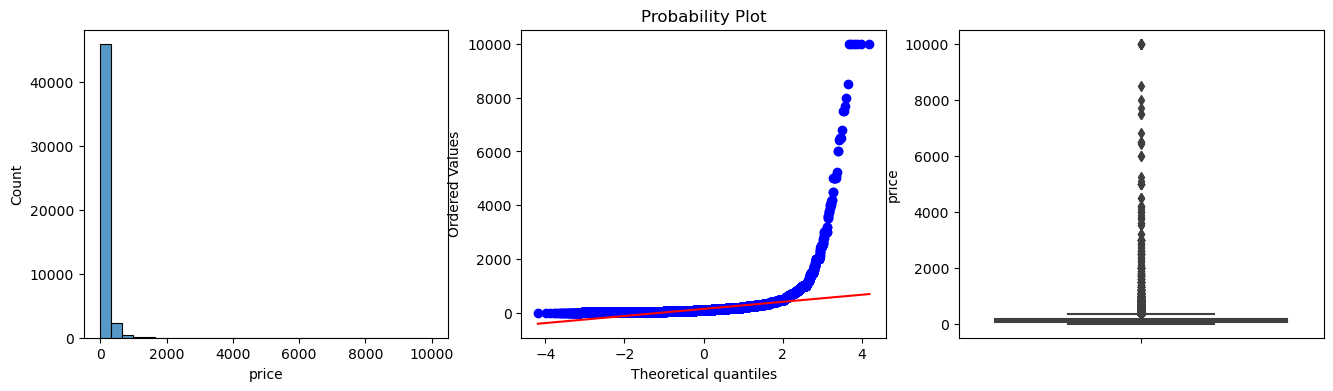

In [14]:
diag_plots(df, 'price')

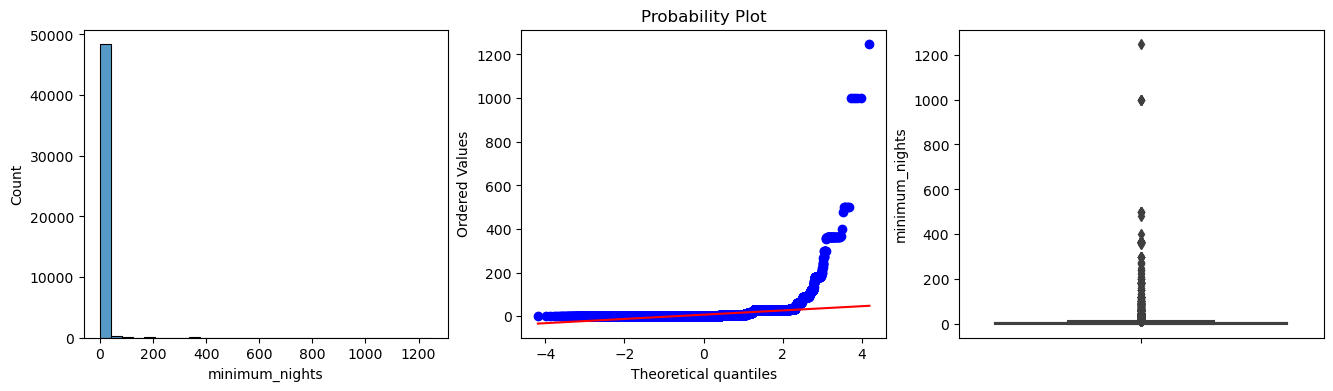

In [15]:
diag_plots(df, 'minimum_nights')

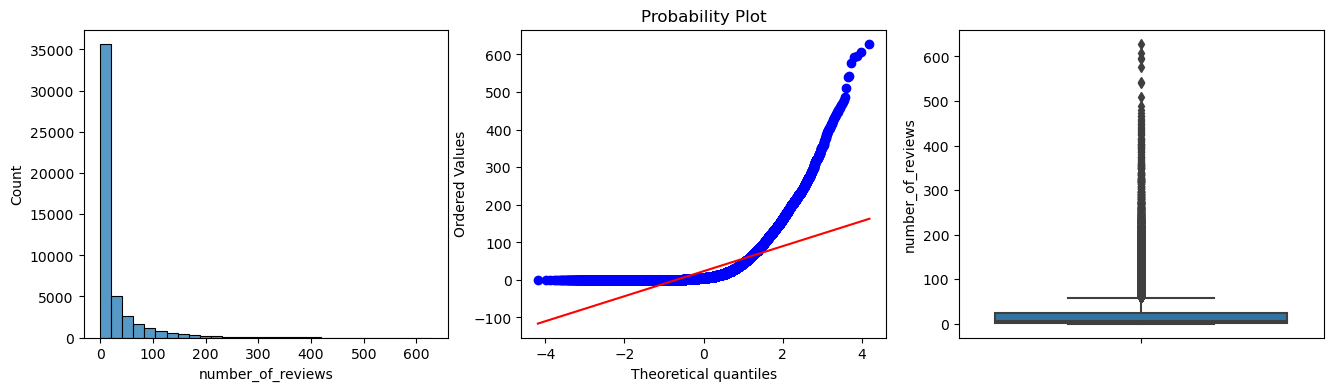

In [16]:
diag_plots(df, 'number_of_reviews')

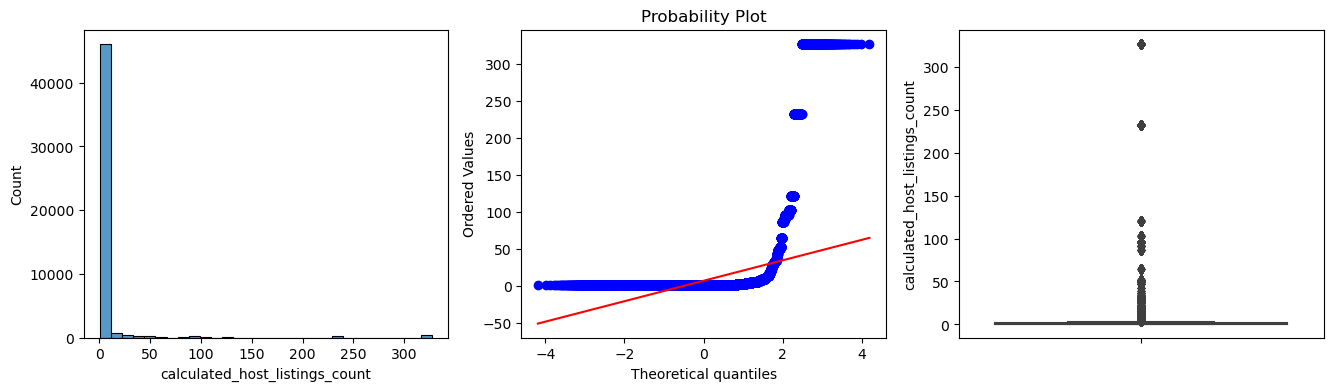

In [17]:
diag_plots(df, 'calculated_host_listings_count')

In [18]:
df_new = df.copy()

## <div style="font-family:Serif;color:#DB3A49; padding:10px; font-size:35px">Using IQR Method

In [19]:
def find_outliers(df_new, variable, distance):
    IQR = df_new[variable].quantile(0.75) - df_new[variable].quantile(0.25)
    
    lower_quantile = df_new[variable].quantile(0.25) - IQR * distance
    upper_quantile = df_new[variable].quantile(0.75) + IQR * distance
    
    return upper_quantile, lower_quantile

In [20]:
#Price
price_upper, price_lower = find_outliers(df_new, 'price', 1.5)
price_upper, price_lower

(334.0, -90.0)

In [21]:
#Minimum Nights
nights_upper, nights_lower = find_outliers(df_new, 'minimum_nights', 1.5)
nights_upper, nights_lower

(11.0, -5.0)

In [22]:
#Number_of_reviews
reviews_upper, reviews_lower = find_outliers(df_new, 'number_of_reviews', 1.5)
reviews_upper, reviews_lower

(58.5, -33.5)

In [23]:
#Calculated Host Listings Count
listings_upper, listings_lower = find_outliers(df_new, 'calculated_host_listings_count', 1.5)
listings_upper, listings_lower

(3.5, -0.5)

In [24]:
df_new = df_new[(df_new['price'] > price_lower) & (df_new['price'] < price_upper)]

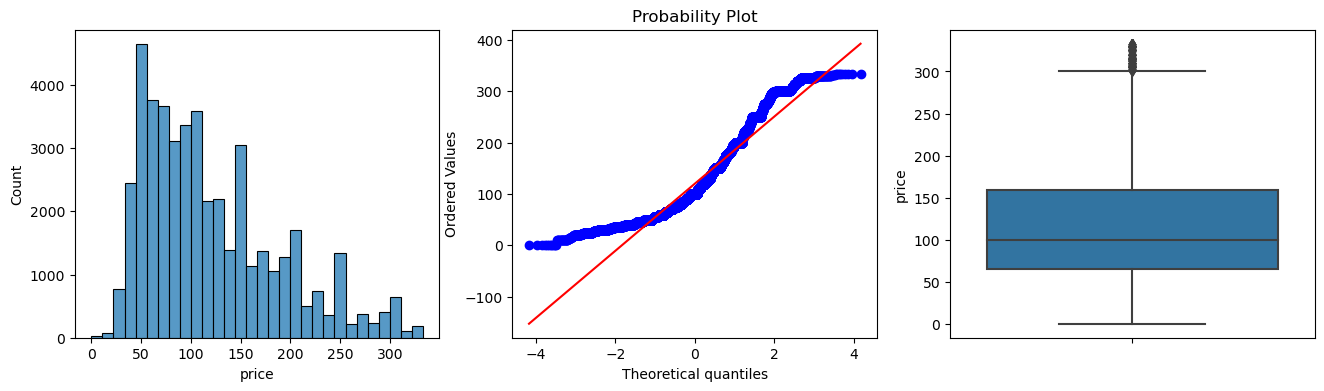

In [25]:
diag_plots(df_new, 'price')

In [26]:
df_new.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.589700e+04,45897.000000,45897.000000,45897.000000,45897.000000,45897.000000,45897.000000,45897.000000,45897.000000
mean,6.632585e+07,40.728483,-73.950730,119.951130,6.937447,23.936619,1.107722,6.622590,109.371026
std,7.756342e+07,0.055333,0.046471,68.115776,19.861692,45.311050,1.612546,30.945271,130.270169
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.721149e+06,40.689230,-73.981920,65.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,3.028359e+07,40.721770,-73.954360,100.000000,2.000000,5.000000,0.380000,1.000000,39.000000
75%,1.054625e+08,40.763390,-73.934310,159.000000,5.000000,24.000000,1.620000,2.000000,216.000000
max,2.743213e+08,40.913060,-73.712990,333.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<div style="font-family:Serif;background-color:#D6EAF8; padding:30px; font-size:17px">
<b>The Price column is now resolved. No outliers and no value below 0. </b>

In [27]:
df_new = df_new[(df_new['minimum_nights'] > nights_lower) & (df_new['minimum_nights'] < nights_upper)]

In [28]:
df_new.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.968700e+04,39687.000000,39687.000000,39687.000000,39687.000000,39687.000000,39687.000000,39687.000000,39687.000000
mean,6.623502e+07,40.727562,-73.949139,119.005165,2.689823,26.380654,1.232659,3.074886,97.200267
std,7.752419e+07,0.056297,0.047720,67.177124,1.849458,47.481567,1.683572,19.756383,124.370928
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.825716e+06,40.688065,-73.981045,65.000000,1.000000,1.000000,0.070000,1.000000,0.000000
50%,3.073039e+07,40.720070,-73.953320,100.000000,2.000000,7.000000,0.510000,1.000000,25.000000
75%,1.036309e+08,40.763260,-73.932150,155.000000,3.000000,29.000000,1.890000,2.000000,179.000000
max,2.743213e+08,40.913060,-73.712990,333.000000,10.000000,629.000000,58.500000,327.000000,365.000000


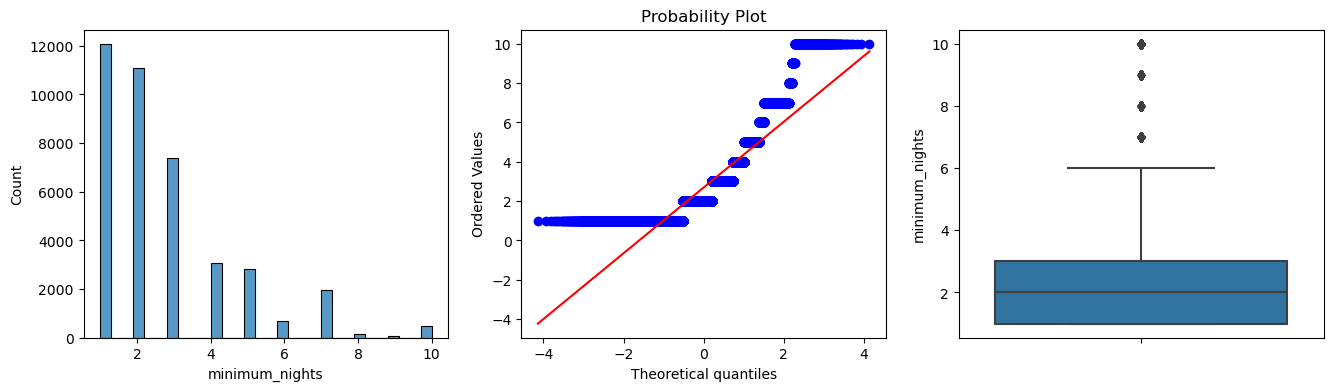

In [29]:
diag_plots (df_new, 'minimum_nights')

In [30]:
df_new = df_new[(df_new['number_of_reviews'] > reviews_lower) & (df_new['number_of_reviews'] < reviews_upper)]

In [31]:
df_new.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.403100e+04,34031.000000,34031.000000,34031.000000,34031.000000,34031.000000,34031.000000,34031.000000,34031.000000
mean,7.016159e+07,40.727720,-73.949796,119.401369,2.770298,10.633658,0.898315,3.240105,85.774647
std,8.036565e+07,0.056239,0.047135,67.838324,1.915489,13.845909,1.358453,21.313650,121.725013
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8.726007e+06,40.688820,-73.981270,65.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.306444e+07,40.720300,-73.953700,100.000000,2.000000,4.000000,0.320000,1.000000,8.000000
75%,1.126543e+08,40.763160,-73.933025,156.000000,3.000000,15.000000,1.140000,2.000000,154.000000
max,2.743213e+08,40.913060,-73.712990,333.000000,10.000000,58.000000,20.940000,327.000000,365.000000


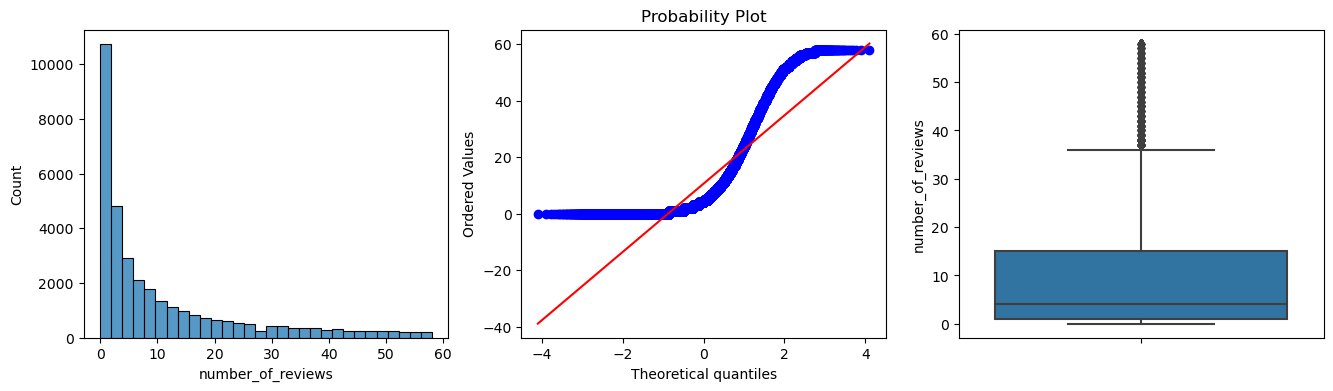

In [32]:
diag_plots(df_new, 'number_of_reviews')

In [33]:
df_new = df_new[(df_new['calculated_host_listings_count'] > listings_lower) & (df_new['calculated_host_listings_count'] < listings_upper)]

In [34]:
df_new.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.099300e+04,30993.000000,30993.000000,30993.000000,30993.000000,30993.000000,30993.00000,30993.000000,30993.000000
mean,6.465591e+07,40.728260,-73.951231,120.996612,2.833349,10.325622,0.83977,1.271319,73.694189
std,7.679569e+07,0.055918,0.044834,67.339423,1.927475,13.713511,1.31221,0.566371,113.703467
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
25%,7.963317e+06,40.689320,-73.980990,69.000000,1.000000,1.000000,0.04000,1.000000,0.000000
50%,2.941214e+07,40.720370,-73.954160,100.000000,2.000000,4.000000,0.28000,1.000000,2.000000
75%,9.595877e+07,40.763640,-73.935620,160.000000,4.000000,14.000000,1.02000,1.000000,105.000000
max,2.743213e+08,40.913060,-73.712990,333.000000,10.000000,58.000000,20.94000,3.000000,365.000000


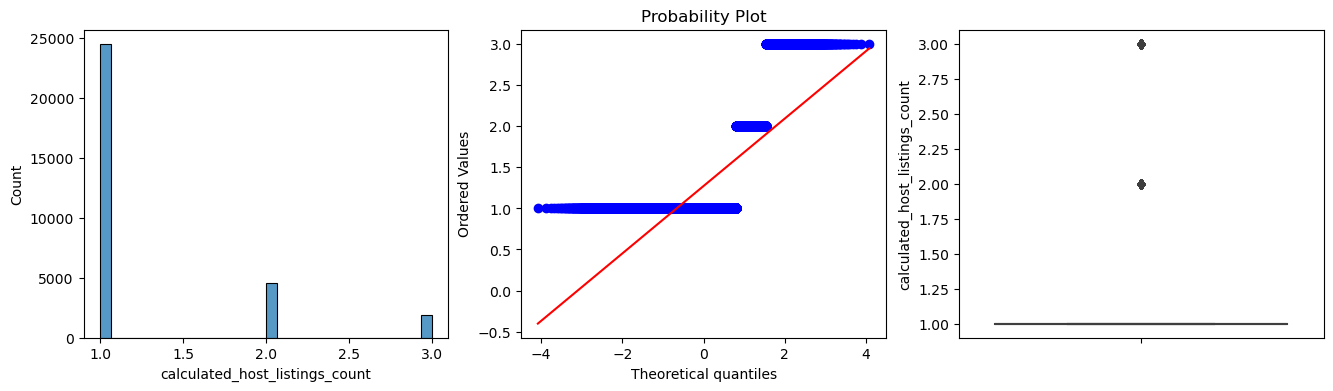

In [35]:
diag_plots(df_new, 'calculated_host_listings_count')

In [36]:
df.shape

(48874, 13)

In [37]:
df_new.shape

(30993, 13)

<a id="1"></a>
# <div style="padding:20px;color:#1B2631;margin:0;font-size:35px;font-family:Serif;text-align:left;display:fill;border-radius:5px;background-color:#D6EAF8;overflow:hidden"><b>Correlation Heatmap</b></div>

<AxesSubplot:>

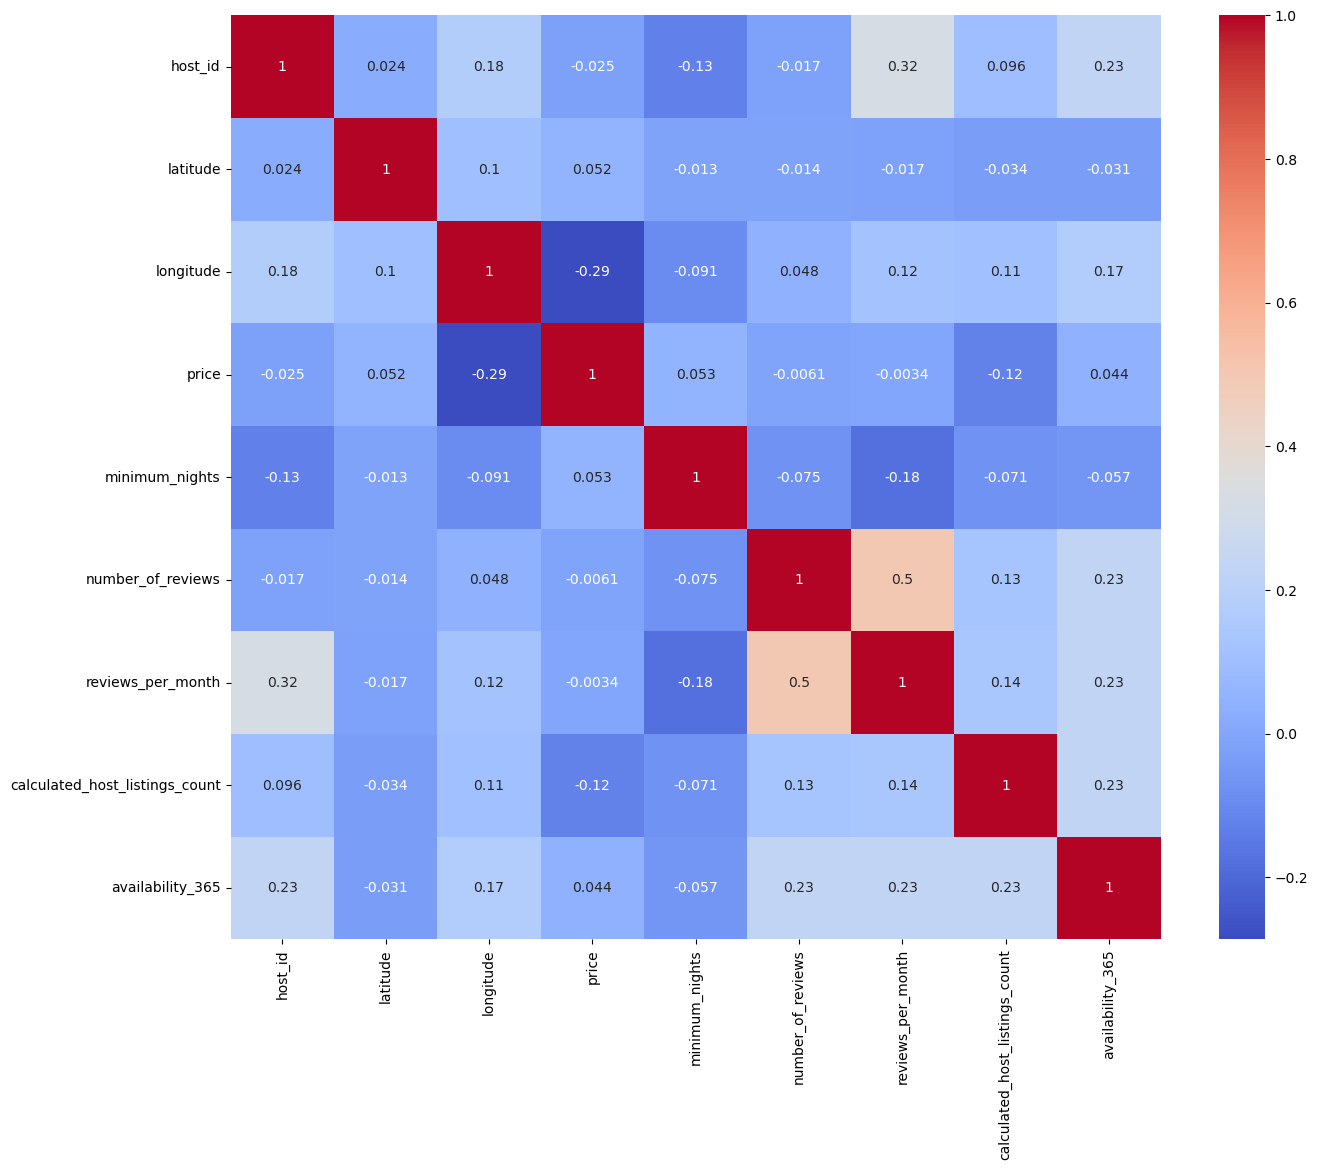

In [38]:
#Visualising the correlation values between all numerical variables
plt.figure(figsize=(15,12))
Variable_corr = df_new.corr()
sns.heatmap(Variable_corr ,cbar=True,annot=True, cmap="coolwarm")

<div style="font-family:Serif;background-color:#D6EAF8; padding:30px; font-size:17px">
<b>Based on the heatmap,reviews_per_month and number_of_reviews have a strong positive correlation. </b>

<a id="1"></a>
# <div style="padding:10px;color:#1B2631;margin:0;font-size:35px;font-family:Serif;text-align:left;display:fill;border-radius:5px;background-color:#D6EAF8;overflow:hidden"><b>KMeans Clustering</b></div>

## <div style="font-family:Serif;color:#DB3A49; padding:10px; font-size:35px">Price and Room Availability 

<div style="font-family:Serif;background-color:#D6EAF8; padding:30px; font-size:17px">
<b>We will be clustering price and availability_365 columns. Availability_365 tells how many days the room is operating or available for booking. Once we determine the clusters, we can identify the centers, the datapoints in which can give the user optimum price and room availability.   </b>

In [39]:
df_avail = df_new.copy()

In [40]:
df_avail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30993 entries, 1 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         30993 non-null  int64  
 1   host_name                       30993 non-null  object 
 2   neighbourhood_group             30993 non-null  object 
 3   neighbourhood                   30993 non-null  object 
 4   latitude                        30993 non-null  float64
 5   longitude                       30993 non-null  float64
 6   room_type                       30993 non-null  object 
 7   price                           30993 non-null  int64  
 8   minimum_nights                  30993 non-null  int64  
 9   number_of_reviews               30993 non-null  int64  
 10  reviews_per_month               30993 non-null  float64
 11  calculated_host_listings_count  30993 non-null  int64  
 12  availability_365                

<AxesSubplot:ylabel='Frequency'>

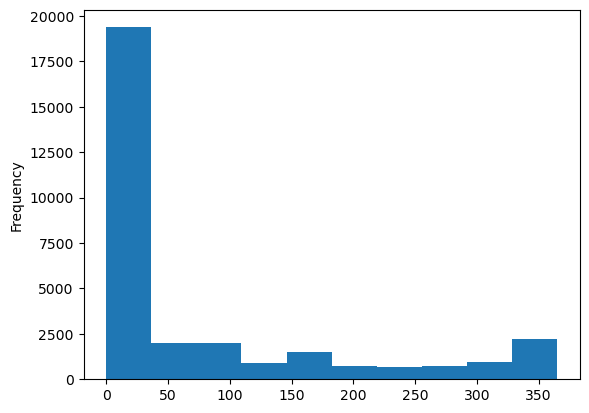

In [41]:
#Checking Availability_365
df_avail['availability_365'].plot(kind='hist')

In [42]:
df_avail['availability_365'].value_counts()

0      15014
365      505
1        295
5        279
89       251
       ...  
186        8
240        8
218        8
226        7
202        6
Name: availability_365, Length: 366, dtype: int64

#Replacing $0 of Room Price
df_avail_zero = df_avail.query('price == 0')
df_avail_zero.replace(to_replace = 0, value = df_avail.price.mean(), inplace=True)
df_avail_zero

In [43]:
df_avail.availability_365.median()

2.0

In [44]:
#Replacing 0 Room Availability with Median of 2
df_avail_rm = df_avail.query('availability_365 == 0')
df_avail_rm.replace(to_replace = 0, value = df_avail.availability_365.median(), inplace=True)

In [45]:
df_avail.shape

(30993, 13)

In [46]:
X = df_avail[['price' , 'availability_365']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

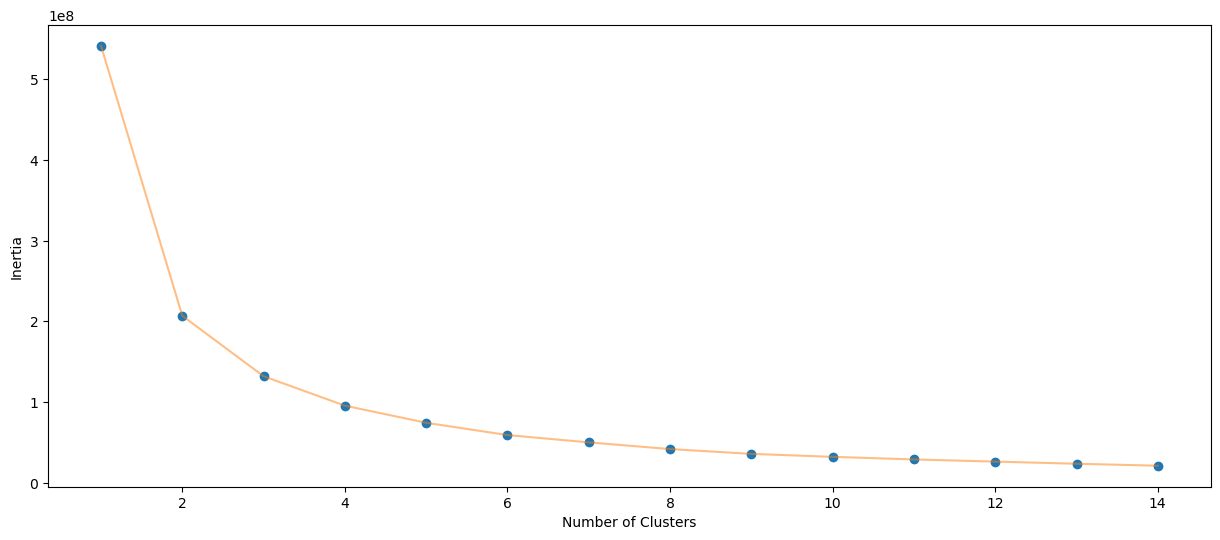

In [47]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [48]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

In [49]:
y_kmeans = algorithm.fit_predict(X)

In [50]:
#adding Cluster to current dataframe
df_avail['cluster'] = pd.DataFrame(y_kmeans)

In [51]:
df_avail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30993 entries, 1 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         30993 non-null  int64  
 1   host_name                       30993 non-null  object 
 2   neighbourhood_group             30993 non-null  object 
 3   neighbourhood                   30993 non-null  object 
 4   latitude                        30993 non-null  float64
 5   longitude                       30993 non-null  float64
 6   room_type                       30993 non-null  object 
 7   price                           30993 non-null  int64  
 8   minimum_nights                  30993 non-null  int64  
 9   number_of_reviews               30993 non-null  int64  
 10  reviews_per_month               30993 non-null  float64
 11  calculated_host_listings_count  30993 non-null  int64  
 12  availability_365                

In [52]:
df_avail['cluster'] = df_avail['cluster'].fillna(df_avail['cluster'].median())

In [53]:
df_avail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30993 entries, 1 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         30993 non-null  int64  
 1   host_name                       30993 non-null  object 
 2   neighbourhood_group             30993 non-null  object 
 3   neighbourhood                   30993 non-null  object 
 4   latitude                        30993 non-null  float64
 5   longitude                       30993 non-null  float64
 6   room_type                       30993 non-null  object 
 7   price                           30993 non-null  int64  
 8   minimum_nights                  30993 non-null  int64  
 9   number_of_reviews               30993 non-null  int64  
 10  reviews_per_month               30993 non-null  float64
 11  calculated_host_listings_count  30993 non-null  int64  
 12  availability_365                

In [54]:
df_avail['cluster'].value_counts()

2.0    22024
0.0     4960
1.0     4009
Name: cluster, dtype: int64

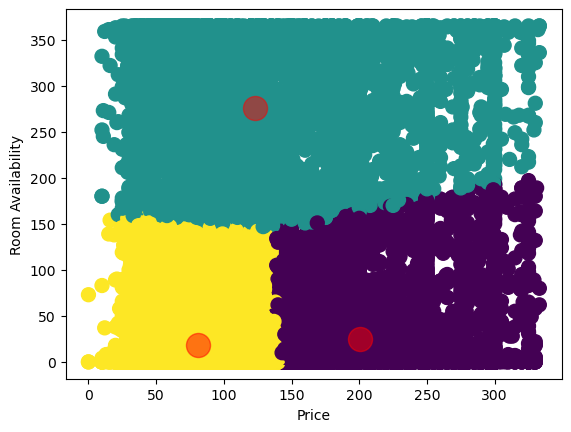

In [55]:
#Mapping the clusters
plt.scatter( x = 'price' ,y = 'availability_365' , data = df_avail, c = labels , 
            s = 100 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Room Availability') , plt.xlabel('Price')
plt.show()

In [56]:
#Checking the Cluster Centers
centroids

array([[200.5278292 ,  24.93928175],
       [122.78170543, 275.38310078],
       [ 81.0966545 ,  18.59489051]])

<div style="font-family:Serif;background-color:#D6EAF8; padding:30px; font-size:17px">
<b>The graph above shows the clusters as to price and the number of days the rooms are available in a year. First cluster located at coordinates [200.527, 24.939] shows a price of about \$25 and availability of 200 days. Second cluster located at coordinates [122.781, 275.383] shows a price of about \$275 and availability of 122 days. Third cluster located at coordinates [81.096, 18.594] shows a price of about \$18 and room availability at 81 days. </b>
</br>
<b> This means that for a room to be operating for 75% of a year can have an average price of \$122 whereas a room to be operating 5% of a year can have an average price of \$81. If you are considering a price of $122 dollars, expect a room that has been used 75% times in one year.</b>

<a id="1"></a>
# <div style="padding:10px;color:#1B2631;margin:0;font-size:35px;font-family:Serif;text-align:left;display:fill;border-radius:5px;background-color:#D6EAF8;overflow:hidden"><b>Mapping the Clusters</b></div>

In [57]:
centroids

array([[200.5278292 ,  24.93928175],
       [122.78170543, 275.38310078],
       [ 81.0966545 ,  18.59489051]])

## <div style="font-family:Serif;color:#DB3A49; padding:10px; font-size:35px">First Cluster $200 - Price, 25 days - Room Availability

In [58]:
#Separating the Clusters By Its Coordinates
df_clus1 = df_avail.query('availability_365 == 25' and 'price == 200')

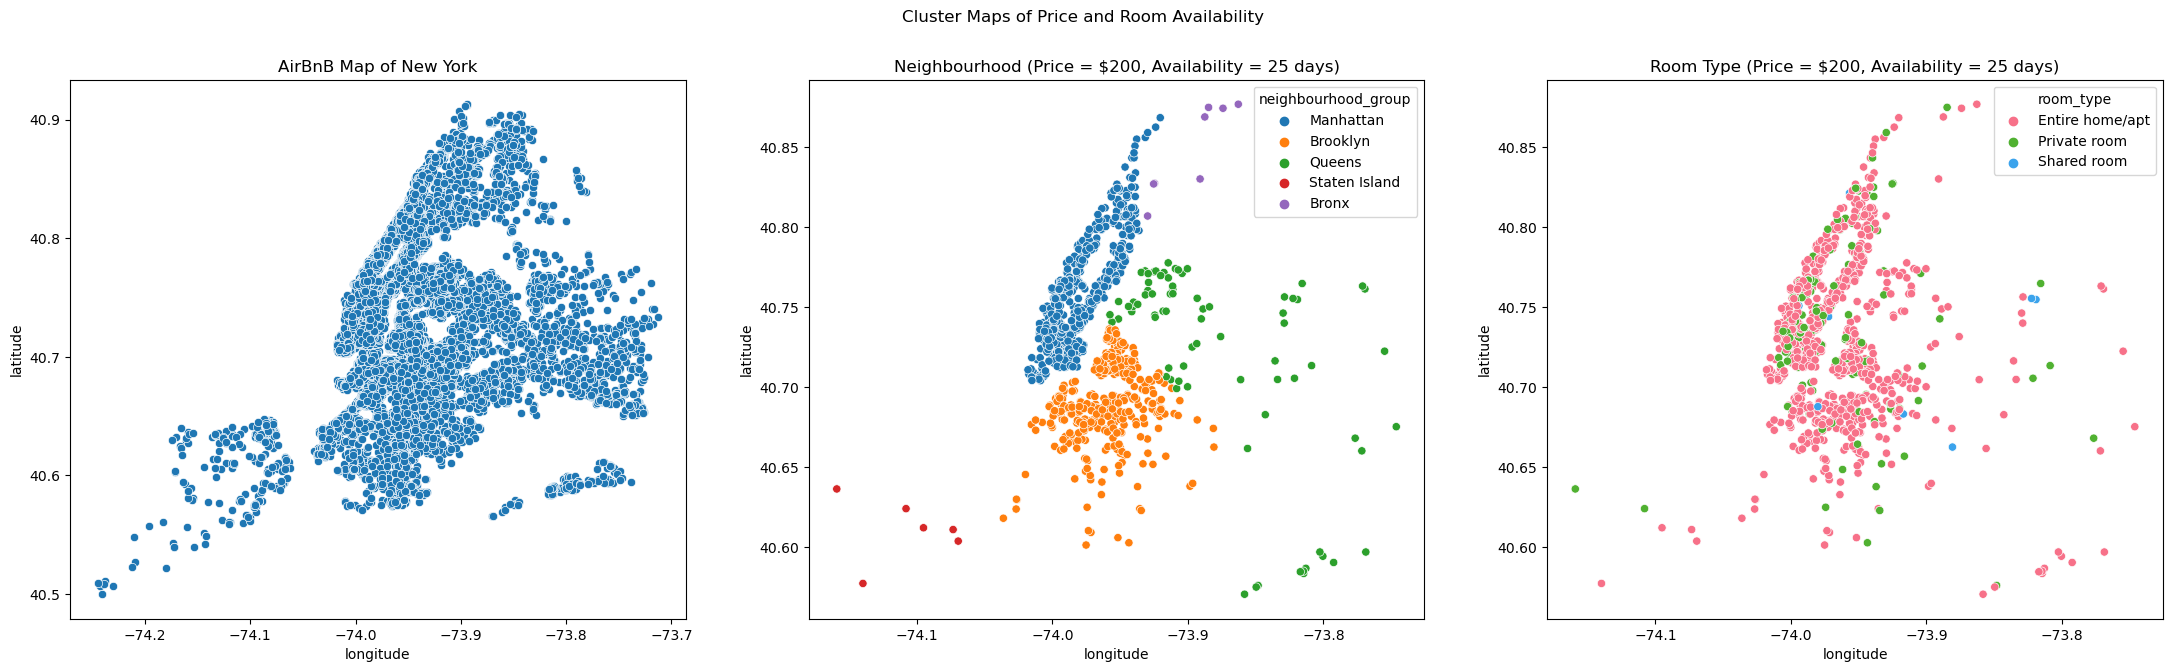

In [59]:
#Visualising availability of all neighbourhood group 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(27,7))
ax = axes.flatten()
sns.scatterplot(data=df_avail, x='longitude', y='latitude', ax=ax[0])
ax[0].set_title('AirBnB Map of New York')
sns.scatterplot(data=df_clus1, x='longitude', y='latitude', hue='neighbourhood_group', ax=ax[1])
ax[1].set_title('Neighbourhood (Price = $200, Availability = 25 days)')
sns.scatterplot(data=df_clus1, x='longitude', y='latitude', hue='room_type', palette='husl', ax=ax[2])
ax[2].set_title('Room Type (Price = $200, Availability = 25 days)')
fig.suptitle('Cluster Maps of Price and Room Availability')
plt.show()

<div style="font-family:Serif;background-color:#D6EAF8; padding:30px; font-size:17px">
<b>The graph above shows the first cluster as mapped in New York with \$200 as price and room availability of 25 days. Most of it are found in Brooklyn followed by Manhattan. You can find the rest sporadically in Queens, Staten Island, and Bronx. As to room types for \$200 and availability of 25 days, you can find an entire apartment spread across New York mostly in Manhattan and Bronx. </b>

## <div style="font-family:Serif;color:#DB3A49; padding:10px; font-size:35px">Second Cluster $200 - Price, 25 days - Room Availability

In [60]:
df_clus2 = df_avail.query('availability_365 == 275' and 'price == 128')

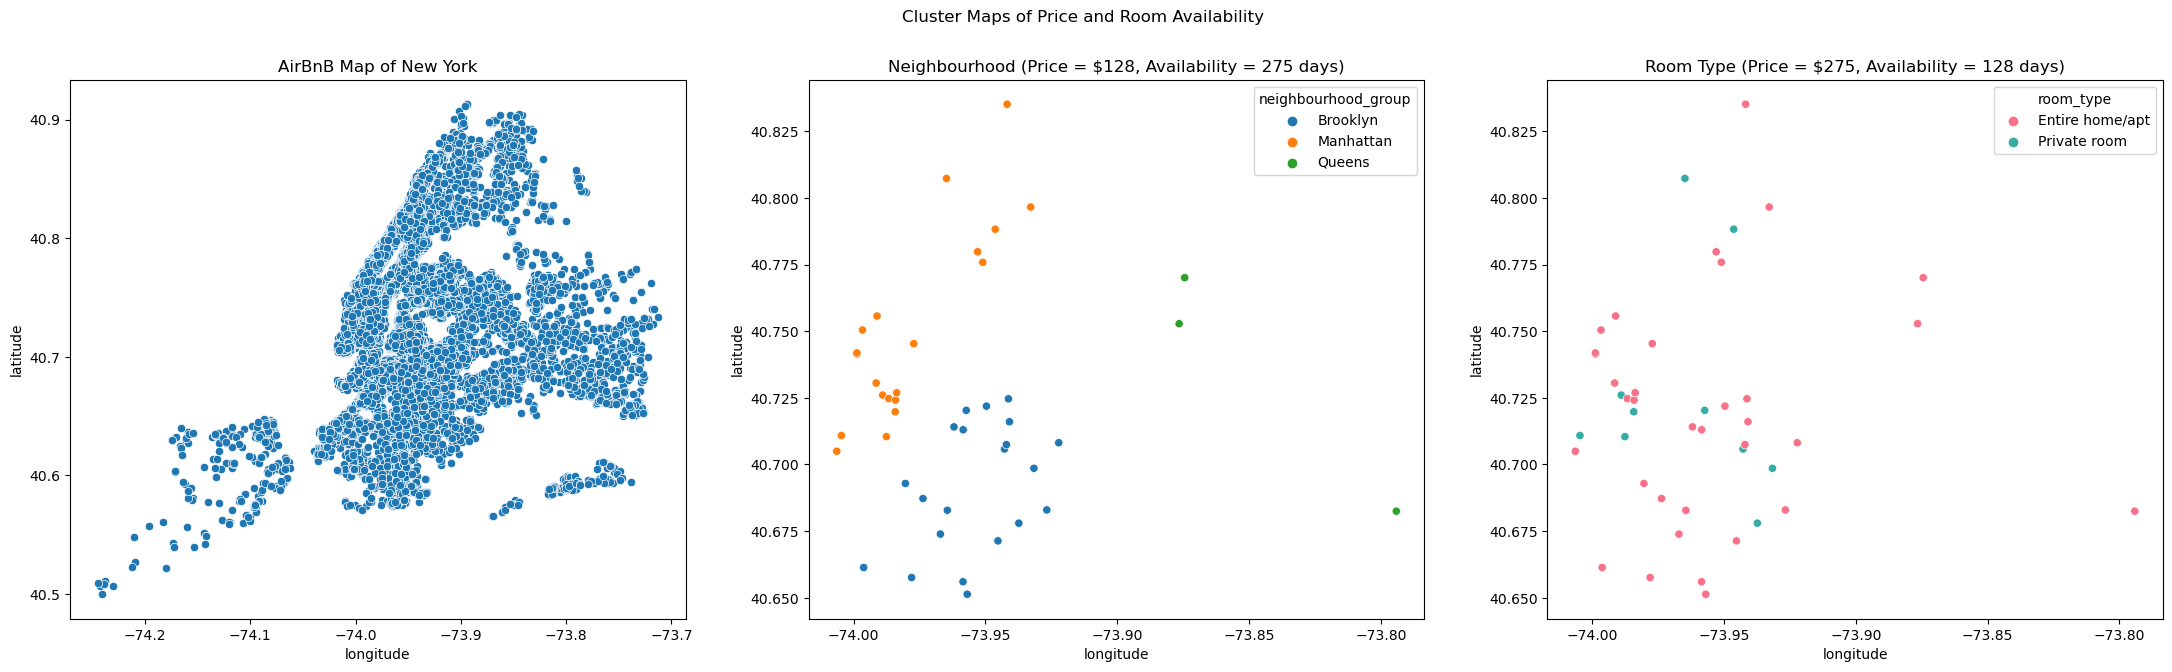

In [61]:
#Visualising availability of all neighbourhood group 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(27,7))
ax = axes.flatten()
sns.scatterplot(data=df_avail, x='longitude', y='latitude', ax=ax[0])
ax[0].set_title('AirBnB Map of New York')
sns.scatterplot(data=df_clus2, x='longitude', y='latitude', hue='neighbourhood_group', ax=ax[1])
ax[1].set_title('Neighbourhood (Price = $128, Availability = 275 days)')
sns.scatterplot(data=df_clus2, x='longitude', y='latitude', hue='room_type', palette='husl', ax=ax[2])
ax[2].set_title('Room Type (Price = $275, Availability = 128 days)')
fig.suptitle('Cluster Maps of Price and Room Availability')
plt.show()

<div style="font-family:Serif;background-color:#D6EAF8; padding:30px; font-size:17px">
<b>The graph above shows the second cluster as mapped in New York with \$128 as price and room availability of 275 days. Most of it are found in Brooklyn followed by Manhattan. You can find the rest sporadically in Queens but not in Staten Island and Bronx. As to room types for \$128 and availability of 275 days, you can find an entire apartment and private rooms</b>

## <div style="font-family:Serif;color:#DB3A49; padding:10px; font-size:35px">Third Cluster $281 - Price, 18 days - Room Availability

In [62]:
df_clus3 = df_avail.query('availability_365 == 18' and 'price == 81')

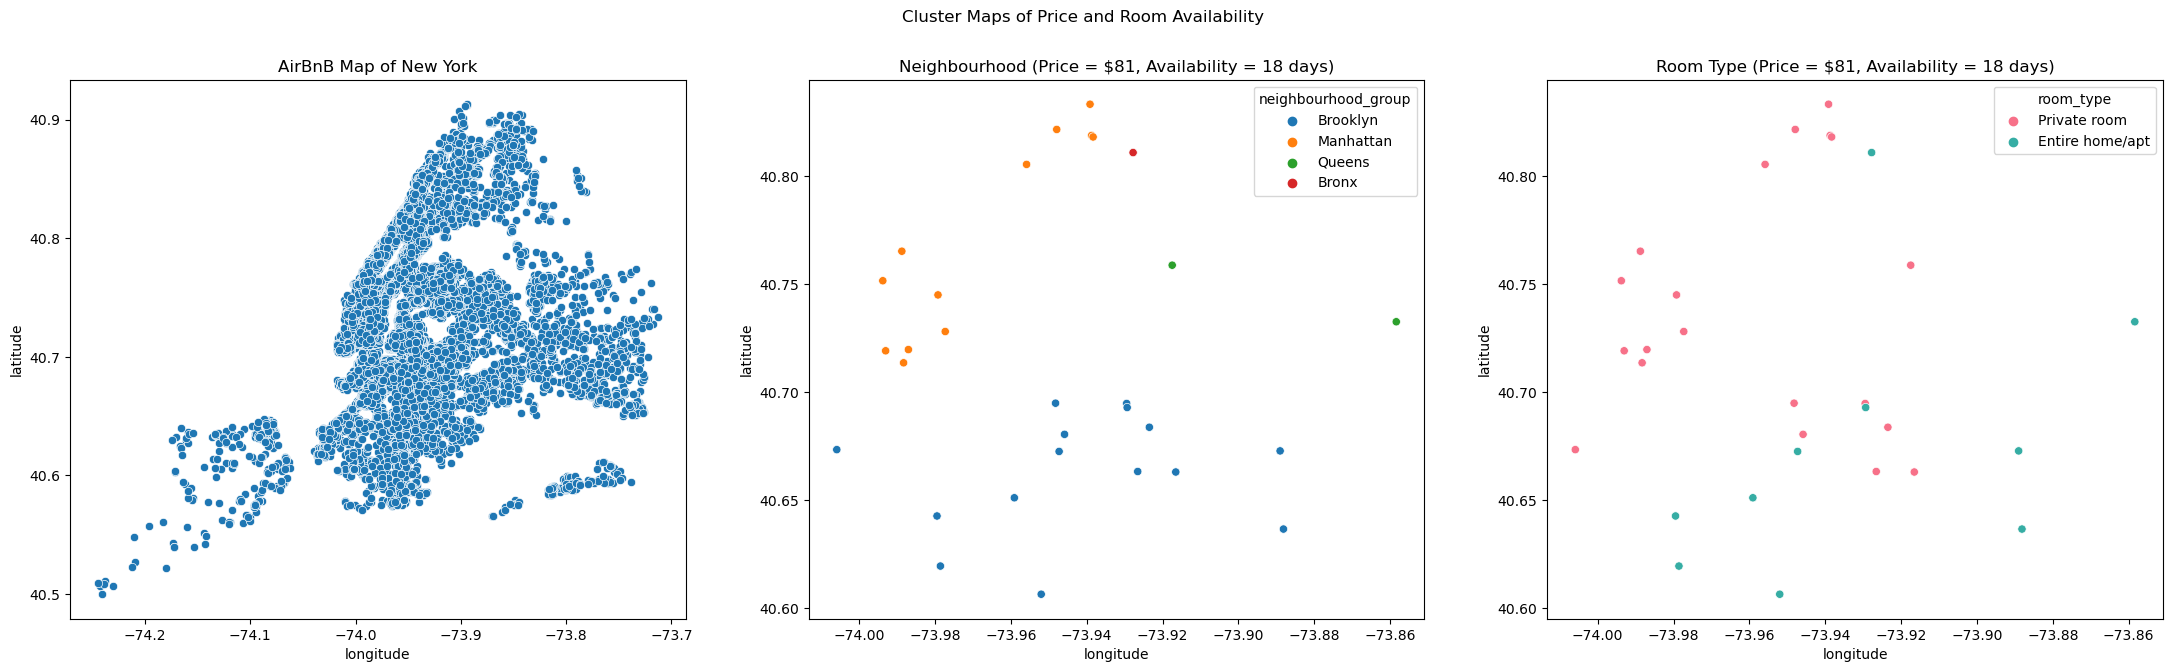

In [63]:
#Visualising availability of all neighbourhood group 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(27,7))
ax = axes.flatten()
sns.scatterplot(data=df_avail, x='longitude', y='latitude', ax=ax[0])
ax[0].set_title('AirBnB Map of New York')
sns.scatterplot(data=df_clus3, x='longitude', y='latitude', hue='neighbourhood_group', ax=ax[1])
ax[1].set_title('Neighbourhood (Price = $81, Availability = 18 days)')
sns.scatterplot(data=df_clus3, x='longitude', y='latitude', hue='room_type', palette='husl', ax=ax[2])
ax[2].set_title('Room Type (Price = $81, Availability = 18 days)')
fig.suptitle('Cluster Maps of Price and Room Availability')
plt.show()

<div style="font-family:Serif;background-color:#D6EAF8; padding:30px; font-size:17px">
<b>The graph above shows the third and last cluster as mapped in New York with \$81 as price and room availability of 18 days. You can find some of it in but not many around the neighbourhood groups. As to room types for \$81 and availability of 18 days, you can find entire apartments and private rooms.</b>

#### <div style='text-align:center; font-family:arial'> If you like my project, kindly leave a thumbs up! Thanks.<br></div><b>